In [1]:
#Importing all the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.metrics.pairwise import cosine_similarity

# Introduction and Business Understanding

Refer to:https://www.britannica.com/money/retailing
https://www.statista.com/statistics/678153/amazon-ad-cost/#:~:text=Since%202014%2C%20Amazon%27s%20annual%20advertising,dollars%20in%20the%20previous%20year.
https://www.forbes.com/advisor/business/start-a-blog/

Retailing is the selling of goods and services to consumer end users, according to ENCYCLOPAEDIA BRITANNICA. Since internet has become nearly indispensable in peoples lives, mechanisms to use it to enhance sales and increase profits has been developed and optimized. Nowadays, the aquisition of data from users permitted companies to achieve a certain level of knowledge about people navigating through internet that has made possible to them to create a customized experience to each person, turning them in potential customers. This experience comes often through advertising, customized according to each person personal data collected from diverse sources, including navigating history, previous online purchase activity, and even data collected from microphones in our mobile devices.

Companies pay for this data, and they pay sources of information that gather viewers to include advertising in their websites leading to retailers profits.  For instance, according to (Coppola, 2023), Amazon has spent over 20 billion dollars in advertising and other promotional costs. To use this data in an efficient way, making the most out of advertising, retailers use Machine Learning models to understand peoples preferences, and recommend products according to behavior and to their personal data. These Machine Learning models are called Recommendation Systems. 

The dataset that will be explored in this project can be found in the link https://www.kaggle.com/datasets/shuyangli94/food-com-recipes-and-user-interactions/data?select=interactions_validation.csv, and it refers to data collected from a website that provides culinary recipes to users, in a format of a blog. The dataset was chosen because it contains similar features to retailers. Although it does not aim to sell its recipes, blogs are one of the sources targeted by companies to expose advertising. According to (Mimi Polner, 2023), blogs can be used to bring in sales or an income, and bloggers bring in an average annual income of $37,073. Some of the ways explored by the article that brings income to bloggers are Advertising Networks, Digital Products, Affiliate Links or Codes and Premium Content. We can therefore, consider blogs as a direct advertising retail business, in which the blogger aim to sell space for advertising in its website, and the quality of the content and experience will bring in more viewers, potentially increasing profits.

When we first verified our dataset, we noticed it contains 231,637 recipes! That may generate confusion on users that might head towards a more classified source of information. This is when recommendation systems comer to action. It is able to analyse customers preferences and recommend them customized content, so that they can increase interaction and improve experience with the website. As we will verify below, this can be achieved based exclusively on the content previously consumed by the user, called content based recommendation system, or based in content previously consumed by other users with similar interests to the first, called collaborative recommendation system.

In [99]:
#Importing both dataset that will be used on the analysis
df_recipes = pd.read_csv('/Users/arthurassis/Documents/CCT - Data Analytics for Business/Machine Learning/Semester 2/CA02-MachineLearning:DataVisualisation-Semester 2/archive/RAW_recipes.csv')
df_users = pd.read_csv('/Users/arthurassis/Documents/CCT - Data Analytics for Business/Machine Learning/Semester 2/CA02-MachineLearning:DataVisualisation-Semester 2/archive/RAW_interactions.csv')

# Data cleaning and visualisation

In [100]:
#Verifying the first 5 rows off the recipes dataset
df_recipes.head()

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7
1,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",6
2,all in the kitchen chili,112140,130,196586,2005-02-25,"['time-to-make', 'course', 'preparation', 'mai...","[269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]",6,"['brown ground beef in large pot', 'add choppe...",this modified version of 'mom's' chili was a h...,"['ground beef', 'yellow onions', 'diced tomato...",13
3,alouette potatoes,59389,45,68585,2003-04-14,"['60-minutes-or-less', 'time-to-make', 'course...","[368.1, 17.0, 10.0, 2.0, 14.0, 8.0, 20.0]",11,['place potatoes in a large pot of lightly sal...,"this is a super easy, great tasting, make ahea...","['spreadable cheese with garlic and herbs', 'n...",11
4,amish tomato ketchup for canning,44061,190,41706,2002-10-25,"['weeknight', 'time-to-make', 'course', 'main-...","[352.9, 1.0, 337.0, 23.0, 3.0, 0.0, 28.0]",5,['mix all ingredients& boil for 2 1 / 2 hours ...,my dh's amish mother raised him on this recipe...,"['tomato juice', 'apple cider vinegar', 'sugar...",8


In [101]:
#Verifying basic informations of the recipes dataset
df_recipes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231637 entries, 0 to 231636
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   name            231636 non-null  object
 1   id              231637 non-null  int64 
 2   minutes         231637 non-null  int64 
 3   contributor_id  231637 non-null  int64 
 4   submitted       231637 non-null  object
 5   tags            231637 non-null  object
 6   nutrition       231637 non-null  object
 7   n_steps         231637 non-null  int64 
 8   steps           231637 non-null  object
 9   description     226658 non-null  object
 10  ingredients     231637 non-null  object
 11  n_ingredients   231637 non-null  int64 
dtypes: int64(5), object(7)
memory usage: 21.2+ MB


We can verify that our dataset contains 231,637 observations and 12 features. It seems that the data is nearly complete, except for 1 recipe that does not have name, and around 5,000 that does not have any description. We can drop those observations once they represent something around 2% of our dataset. 

We also verify that our dataset has a date feature, that is read as an object, and it will be converted into datetime object to help in future analysis.

In [102]:
#Dropping null observations for the columns name and description.
df_recipes.name.dropna(inplace = True)
df_recipes.description.dropna(inplace = True)

In [103]:
#Converting the column submitted into datetime object
df_recipes['submitted'] = pd.to_datetime(df_recipes['submitted'])

In [104]:
#Verifying the first 5 rows of the interactions dataset
df_users.head()

,user_id,recipe_id,date,rating,review
0,38094,40893,2003-02-17,4,Great with a salad. Cooked on top of stove for...
1,1293707,40893,2011-12-21,5,"So simple, so delicious! Great for chilly fall..."
2,8937,44394,2002-12-01,4,This worked very well and is EASY. I used not...
3,126440,85009,2010-02-27,5,I made the Mexican topping and took it to bunk...
4,57222,85009,2011-10-01,5,"Made the cheddar bacon topping, adding a sprin..."


In [105]:
#Verifying basic informations of the interactions dataset
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1132367 entries, 0 to 1132366
Data columns (total 5 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   user_id    1132367 non-null  int64 
 1   recipe_id  1132367 non-null  int64 
 2   date       1132367 non-null  object
 3   rating     1132367 non-null  int64 
 4   review     1132198 non-null  object
dtypes: int64(3), object(2)
memory usage: 43.2+ MB


It is possible to verify that in this case we have over a million observations and 5 features. Again the data is quite clean, and only less than 200 fields on reviews are null, what represents a negligible parcell of the whole that, and there it will also be dropped. We will also convert the date column in this case to a datetime object.

In [106]:
#Dropping null observations on the column review
df_users.review.dropna(inplace = True)

In [107]:
#Converting the column date into datetime object
df_users['date'] = pd.to_datetime(df_users['date'])

Now, we will merge the dataset of our recipes, into the dataset of our reviews, so that we can have one single dataset containing recipes and reviews.

In [108]:
#Renaming the column id on the recipe dataset to match the name on the users dataset
df_recipes.rename(columns= {'id':'recipe_id'}, inplace = True)

In [109]:
df = pd.merge(df_users, df_recipes, on = 'recipe_id', how = 'left')

In [110]:
df.head()

,user_id,recipe_id,date,rating,review,name,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
0,38094,40893,2003-02-17,4,Great with a salad. Cooked on top of stove for...,white bean green chile pepper soup,495,1533,2002-09-21,"['weeknight', 'time-to-make', 'course', 'main-...","[204.8, 5.0, 9.0, 26.0, 24.0, 2.0, 10.0]",4,"['combine beans , onion , chilies , 1 / 2 teas...",easy soup for the crockpot.,"['great northern beans', 'yellow onion', 'dice...",9
1,1293707,40893,2011-12-21,5,"So simple, so delicious! Great for chilly fall...",white bean green chile pepper soup,495,1533,2002-09-21,"['weeknight', 'time-to-make', 'course', 'main-...","[204.8, 5.0, 9.0, 26.0, 24.0, 2.0, 10.0]",4,"['combine beans , onion , chilies , 1 / 2 teas...",easy soup for the crockpot.,"['great northern beans', 'yellow onion', 'dice...",9
2,8937,44394,2002-12-01,4,This worked very well and is EASY. I used not...,devilicious cookie cake delights,20,56824,2002-10-27,"['30-minutes-or-less', 'time-to-make', 'course...","[132.3, 11.0, 39.0, 5.0, 4.0, 11.0, 5.0]",5,"['blend together cake mix , oil and eggs', 'ad...",NaN,"[""devil's food cake mix"", 'vegetable oil', 'eg...",4
3,126440,85009,2010-02-27,5,I made the Mexican topping and took it to bunk...,baked potato toppings,10,64342,2004-02-25,"['15-minutes-or-less', 'time-to-make', 'course...","[2786.2, 342.0, 134.0, 290.0, 161.0, 301.0, 42.0]",3,['pick whichever topping you want to use and c...,these toppings sure makes a nice change from p...,"['mayonnaise', 'salsa', 'cheddar cheese', 'ref...",13
4,57222,85009,2011-10-01,5,"Made the cheddar bacon topping, adding a sprin...",baked potato toppings,10,64342,2004-02-25,"['15-minutes-or-less', 'time-to-make', 'course...","[2786.2, 342.0, 134.0, 290.0, 161.0, 301.0, 42.0]",3,['pick whichever topping you want to use and c...,these toppings sure makes a nice change from p...,"['mayonnaise', 'salsa', 'cheddar cheese', 'ref...",13


In [111]:
#Verifying main informations of our dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1132367 entries, 0 to 1132366
Data columns (total 16 columns):
 #   Column          Non-Null Count    Dtype         
---  ------          --------------    -----         
 0   user_id         1132367 non-null  int64         
 1   recipe_id       1132367 non-null  int64         
 2   date            1132367 non-null  datetime64[ns]
 3   rating          1132367 non-null  int64         
 4   review          1132198 non-null  object        
 5   name            1132366 non-null  object        
 6   minutes         1132367 non-null  int64         
 7   contributor_id  1132367 non-null  int64         
 8   submitted       1132367 non-null  datetime64[ns]
 9   tags            1132367 non-null  object        
 10  nutrition       1132367 non-null  object        
 11  n_steps         1132367 non-null  int64         
 12  steps           1132367 non-null  object        
 13  description     1108857 non-null  object        
 14  ingredients     11

We will again drop our null observations.

In [112]:
#Dropping null values
df.dropna(inplace = True)

Let us visualise now some features of our data.

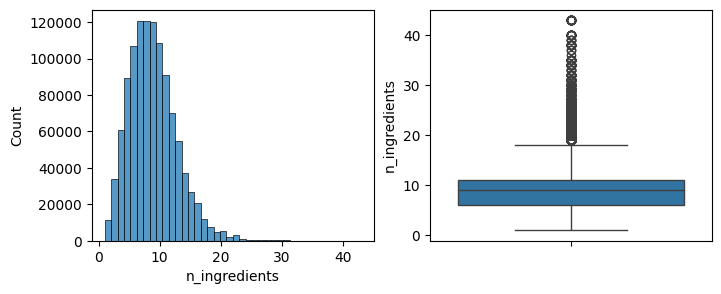

In [113]:
#Printing the distribution of n_ingredients
fig, ax = plt.subplots(ncols=2, figsize=[8, 3])
sns.histplot(df['n_ingredients'], bins = 40, ax=ax[0]);
sns.boxplot(data = df, y='n_ingredients', ax=ax[1]);

In [114]:
#Verifying the number of times each recipe was reviewed.
df['recipe_id'].value_counts()

2886      1609
27208     1601
89204     1579
39087     1448
67256     1322
          ... 
383756       1
323922       1
308247       1
266486       1
386618       1
Name: recipe_id, Length: 226650, dtype: int64

We can verify that our dataset has very few reviews for most of the recipes, whereas a small percentage of it have a high amount of reviews. We will now verify which amount of data might be considered relevant on the scope of this project.

In [115]:
#Counting the number of reviews in our users dataset
recipe_count = df_users.groupby(by = 'recipe_id').size().reset_index()

In [116]:
#Calculating the rating average per recipe in our interation dataset
recipe_rating = df_users.groupby(by = 'recipe_id')['rating'].mean()

In [117]:
#Inserting the rating average on our recipe dataset
df_recipes = pd.merge(df_recipes, recipe_rating, on='recipe_id',
                      how='left')

In [118]:
#Inserting the number of reviews in our recipes dataset
df_recipes = pd.merge(df_recipes, recipe_count, on='recipe_id',
                      how='left')

In [119]:
#Renaming the column for n_reviews
df_recipes.rename(columns = {0:'n_reviews'}, inplace=True)

In [120]:
df_recipes.head()

,name,recipe_id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients,rating,n_reviews
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7,5.0,3
1,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",6,3.5,4
2,all in the kitchen chili,112140,130,196586,2005-02-25,"['time-to-make', 'course', 'preparation', 'mai...","[269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]",6,"['brown ground beef in large pot', 'add choppe...",this modified version of 'mom's' chili was a h...,"['ground beef', 'yellow onions', 'diced tomato...",13,4.0,1
3,alouette potatoes,59389,45,68585,2003-04-14,"['60-minutes-or-less', 'time-to-make', 'course...","[368.1, 17.0, 10.0, 2.0, 14.0, 8.0, 20.0]",11,['place potatoes in a large pot of lightly sal...,"this is a super easy, great tasting, make ahea...","['spreadable cheese with garlic and herbs', 'n...",11,4.5,2
4,amish tomato ketchup for canning,44061,190,41706,2002-10-25,"['weeknight', 'time-to-make', 'course', 'main-...","[352.9, 1.0, 337.0, 23.0, 3.0, 0.0, 28.0]",5,['mix all ingredients& boil for 2 1 / 2 hours ...,my dh's amish mother raised him on this recipe...,"['tomato juice', 'apple cider vinegar', 'sugar...",8,5.0,1


In [121]:
df_recipes[df_recipes['n_reviews']>5].count()

name              42884
recipe_id         42884
minutes           42884
contributor_id    42884
submitted         42884
tags              42884
nutrition         42884
n_steps           42884
steps             42884
description       41963
ingredients       42884
n_ingredients     42884
rating            42884
n_reviews         42884
dtype: int64

We can verify that among our whole dataset, that contains over 200,000 recipes, only around 1/5 contain more than 5 reviews. It will be considered relevant in this dataset only the the 40,000 most reviewed recipes. The 2 reasons for this are the fact that we believe we can perform a better analysis following in this way, and the second is that while performing the methods required on the scope of the project for recommendation systems, the system could not perform the operations with more than 40,000 observations of recipes.

In [122]:
#Filtering the most relevant 40000 recipes on the dataset containing information of users and recipes
reviews_count = df['recipe_id'].value_counts()
most_reviewed = reviews_count.head(40000).index.tolist()
df_relevant = df[df['recipe_id'].isin(most_reviewed)]

In [123]:
#Filtering the most relevant 40000 reviews only on the dataset containing information of recipes
most_relevant_reviews = 40000
relevant_recipes = df_recipes.nlargest(most_relevant_reviews, 'n_reviews').reset_index()

In [124]:
relevant_recipes.head()

,index,name,recipe_id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients,rating,n_reviews
0,22168,best banana bread,2886,65,1762,1999-09-26,"['time-to-make', 'course', 'main-ingredient', ...","[272.8, 16.0, 97.0, 14.0, 7.0, 31.0, 14.0]",13,"['remove odd pots and pans from oven', 'prehea...",you'll never need another banana bread recipe ...,"['butter', 'granulated sugar', 'eggs', 'banana...",8,4.185989,1613
1,213826,to die for crock pot roast,27208,545,28201,2002-05-03,"['weeknight', 'time-to-make', 'course', 'main-...","[295.2, 14.0, 0.0, 15.0, 99.0, 19.0, 0.0]",7,"['place beef roast in crock pot', 'mix the dri...","amazing flavor, and so simple! no salt needed ...","['beef roast', 'brown gravy mix', 'dried itali...",5,4.288570,1601
2,66687,crock pot chicken with black beans cream cheese,89204,243,137839,2004-04-16,"['time-to-make', 'course', 'main-ingredient', ...","[679.2, 53.0, 39.0, 38.0, 91.0, 75.0, 16.0]",5,"['take 4-5 frozen , yes , frozen , boneless ch...",i love this crock-pot chicken recipe for two r...,"['boneless chicken breasts', 'black beans', 'c...",5,4.220393,1579
3,62431,creamy cajun chicken pasta,39087,25,30534,2002-09-02,"['30-minutes-or-less', 'time-to-make', 'course...","[719.1, 63.0, 12.0, 34.0, 78.0, 120.0, 15.0]",4,['place chicken and cajun seasoning in a bowl ...,n'awlin's style of chicken with an updated alf...,"['boneless skinless chicken breast halves', 'l...",12,4.541436,1448
4,22388,best ever banana cake with cream cheese frosting,67256,75,82367,2003-07-24,"['weeknight', 'time-to-make', 'course', 'main-...","[503.5, 31.0, 222.0, 15.0, 11.0, 61.0, 25.0]",18,"['preheat oven to 275f', 'grease and flour a 9...",this is one of (if not) the best banana cake i...,"['bananas', 'lemon juice', 'flour', 'baking so...",13,4.329047,1322


We understand that the number of reviews refers to engagement in one specific page of our website. Therefore, using the information that we have on our dataset, if we are able to discover what increases the number of reviews, we can optimize our website to increase it views, and therefore sales.

This will be discussed by the end of the report, for now, we will turn back to building a recommendation system based on our relevant dataset.

# Building a content based recommendation system

A content based recommendation is a recommendation system which is based exclusively in the characteristics of the products. It bases its recommendations in the similarity that exists between two products. For instance, in our context, if a visitor on the website clicks on a recipe of banana cake, the content based recommendation system is able to provide recommendation of recipes that uses similar ingredients, or spent a similar time to get ready, such as a banana bread. Let us verify how we can build a recommendation system for out data. 

In our case, we will buid a recommendation engine based in three features of our dataset: tags, nutrition and ingredients. Tags are related to the keywords related to the recipe, nutrition is referent to the nutritional values of the recipe, and ingredients, the necessary ingredients to cook the recipe.

In [125]:
#Verifying the average of rating on our relevant dataset
rating_average = relevant_recipes['rating'].mean()
print(rating_average)

4.450785045245674


In [126]:
#Let us see the first 10 rows on 
relevant_recipes.description.head(10)

0    you'll never need another banana bread recipe ...
1    amazing flavor, and so simple! no salt needed ...
2    i love this crock-pot chicken recipe for two r...
3    n'awlin's style of chicken with an updated alf...
4    this is one of (if not) the best banana cake i...
5    absolutely delicious meatloaf and sauce! those...
6    my kids will give up a steak dinner for this s...
7    these are absolutely the chewiest, moistest, f...
8    cooking the meatballs in simmering pasta sauce...
9    we have a japanese girl, tomoko, living with u...
Name: description, dtype: object

In [127]:
#Printing the first row of the feature tag
print(relevant_recipes.tags[0])

['time-to-make', 'course', 'main-ingredient', 'cuisine', 'preparation', 'north-american', 'breads', 'fruit', 'american', 'oven', 'dietary', 'quick-breads', 'equipment', '4-hours-or-less']


In [128]:
#Selecting the filters that we will parse.
features = ['tags','ingredients']

To read our string as a list of itens, we need to parse it. Although when we look to our tags and ingredients, they seem to be a list of values, primarily python reads them only as a sequence of strings, rather than a list of items. To fix this, we can use the function literal_eval that reads the line as though it was a code, and extracts the meaning of it.

In [129]:
# Parse the stringified features into their corresponding python objects
from ast import literal_eval

for feature in features:
    relevant_recipes[feature] = relevant_recipes[feature].apply(literal_eval)

We have chosen in this case to use only the first five tags selected by the person who submitted the recipe. However, using more than 5 could enhance the recommendaton engine, however at cost of more power to process the information. 

Before we select our ingrediets and tags to make the metadata soup, we want to parse our data removing incoviente information that may lead our model to bad results. (Leitch, 2020) discussed the issue of the ingredients for a recommendation systems of recipes utilizing a different dataset. He discusses that some words on our ingredients do not contribute to our recommendations, such and some words that are very common in almost every recipe, such as oil, and weights and measures. Furtermore, he discusses that some words might appear in singular and plural, or using gerunds, suggesting lemmatization as a solution for the issue. He proposes a parser for his own project that will be applyied in our dataset. The parser was found on his Github.

In [130]:
#Parser provided by (Leitch, 2020) on his Github.
import pandas as pd
import nltk
import string
import ast
import re
import unidecode

# nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from collections import Counter
import config

# Weigths and measures are words that will not add value to the model. I got these standard words from
# https://en.wikibooks.org/wiki/Cookbook:Units_of_measurement

# # We lemmatize the words to reduce them to their smallest form (lemmas).
# lemmatizer = WordNetLemmatizer()
# measures = [lemmatizer.lemmatize(m) for m in measures]
# words_to_remove = [lemmatizer.lemmatize(m) for m in words_to_remove]


def ingredient_parser(ingreds):
    """

    This function takes in a list (but it is a string as it comes from pandas dataframe) of
       ingredients and performs some preprocessing.
       For example:

       input = '['1 x 1.6kg whole duck', '2 heaped teaspoons Chinese five-spice powder', '1 clementine',
                 '6 fresh bay leaves', 'GRAVY', '', '1 bulb of garlic', '2 carrots', '2 red onions',
                 '3 tablespoons plain flour', '100 ml Marsala', '1 litre organic chicken stock']'

       output = ['duck', 'chinese five spice powder', 'clementine', 'fresh bay leaf', 'gravy', 'garlic',
                 'carrot', 'red onion', 'plain flour', 'marsala', 'organic chicken stock']

    """
    measures = ['teaspoon', 't', 'tsp.', 'tablespoon', 'T', 'tbl.', 'tb', 'tbsp.', 'fluid ounce', 'fl oz',
                'gill', 'cup', 'c', 'pint', 'p', 'pt', 'fl pt', 'quart', 'q', 'qt', 'fl qt', 'gallon', 
                'g', 'gal', 'ml', 'milliliter', 'millilitre', 'cc', 'mL', 'l', 'liter', 'litre', 'L', 
                'dl', 'deciliter', 'decilitre', 'dL', 'bulb', 'level', 'heaped', 'rounded', 'whole',
                'pinch', 'medium', 'slice', 'pound', 'lb', '#', 'ounce', 'oz', 'mg', 'milligram',
                'milligramme', 'g', 'gram', 'gramme', 'kg', 'kilogram', 'kilogramme', 'x', 'of', 'mm', 
                'millimetre', 'millimeter', 'cm', 'centimeter', 'centimetre', 'm', 'meter', 'metre',
                'inch', 'in', 'milli', 'centi', 'deci', 'hecto', 'kilo']
    words_to_remove = ['fresh', 'oil', 'a', 'red', 'bunch', 
                       'and', 'clove', 'or', 'leaf', 'chilli',
                       'large', 'extra', 'sprig', 'ground', 'handful', 'free', 'small', 'pepper', 'virgin', 'range', 
                       'from', 'dried', 'sustainable', 'black', 'peeled', 'higher', 
                       'welfare', 'seed', 'for', 'finely', 'freshly', 'sea', 'quality', 
                       'white', 'ripe', 'few', 'piece', 'source', 'to', 'organic', 'flat', 
                       'smoked', 'ginger', 'sliced', 'green', 'picked', 'the', 'stick', 'plain',
                       'plus', 'mixed', 'mint', 'bay', 'basil', 'your', 'cumin', 'optional', 
                       'fennel', 'serve', 'mustard', 'unsalted', 'baby', 'paprika', 'fat', 
                       'ask', 'natural', 'skin', 'roughly', 'into', 'such', 'cut', 'good', 
                       'brown', 'grated', 'trimmed', 'oregano', 'powder', 'yellow', 'dusting', 
                       'knob', 'frozen', 'on', 'deseeded', 'low', 'runny', 'balsamic', 'cooked', 
                       'streaky', 'nutmeg', 'sage', 'rasher', 'zest', 'pin', 'groundnut', 'breadcrumb',
                       'turmeric', 'halved', 'grating', 'stalk', 'light', 'tinned', 'dry', 'soft', 
                       'rocket', 'bone', 'colour', 'washed', 'skinless', 'leftover', 'splash', 
                       'removed', 'dijon', 'thick', 'big', 'hot', 'drained', 'sized', 'chestnut', 
                       'watercress', 'fishmonger', 'english', 'dill', 'caper', 'raw', 'worcestershire',
                       'flake', 'cider', 'cayenne', 'tbsp', 'leg', 'pine', 'wild', 'if', 'fine', 'herb',
                       'almond', 'shoulder', 'cube', 'dressing', 'with', 'chunk', 'spice', 'thumb', 'garam',
                       'new', 'little', 'punnet', 'peppercorn', 'shelled', 'saffron', 'other''chopped',
                       'salt', 'olive', 'taste', 'can', 'sauce', 'water', 'diced', 'package', 'italian', 
                       'shredded', 'divided', 'parsley', 'vinegar', 'all', 'purpose', 'crushed', 'juice', 
                       'more', 'coriander', 'bell', 'needed', 'thinly', 'boneless', 'half', 'thyme', 'cubed',
                       'cinnamon', 'cilantro', 'jar', 'seasoning', 'rosemary', 'extract', 'sweet', 'baking',
                       'beaten', 'heavy', 'seeded', 'tin', 'vanilla', 'uncooked', 'crumb', 'style', 'thin', 
                       'nut', 'coarsely', 'spring', 'chili', 'cornstarch', 'strip', 'cardamom', 'rinsed',
                       'honey', 'cherry', 'root', 'quartered', 'head', 'softened', 'container', 'crumbled', 
                       'frying', 'lean', 'cooking', 'roasted', 'warm', 'whipping', 'thawed', 'corn',
                       'pitted', 'sun', 'kosher', 'bite', 'toasted', 'lasagna', 'split', 'melted', 'degree',
                       'lengthwise', 'romano', 'packed', 'pod', 'anchovy', 'rom', 'prepared', 'juiced', 
                       'fluid', 'floret', 'room', 'active', 'seasoned', 'mix', 'deveined', 'lightly',
                       'anise', 'thai', 'size', 'unsweetened', 'torn', 'wedge', 'sour', 'basmati', 
                       'marinara', 'dark', 'temperature', 'garnish', 'bouillon', 'loaf', 'shell', 
                       'reggiano', 'canola', 'parmigiano', 'round', 'canned', 'ghee', 'crust', 
                       'long', 'broken', 'ketchup', 'bulk', 'cleaned', 'condensed', 'sherry', 
                       'provolone', 'cold', 'soda', 'cottage', 'spray', 'tamarind', 'pecorino', 
                       'shortening', 'part', 'bottle', 'sodium', 'cocoa', 'grain', 'french', 'roast', 
                       'stem', 'link', 'firm', 'asafoetida', 'mild', 'dash', 'boiling']
    # The ingredient list is now a string so we need to turn it back into a list. We use ast.literal_eval
    if isinstance(ingreds, list):
        ingredients = ingreds
    else:
        ingredients = ast.literal_eval(ingreds)
    # We first get rid of all the punctuation. We make use of str.maketrans. It takes three input
    # arguments 'x', 'y', 'z'. 'x' and 'y' must be equal-length strings and characters in 'x'
    # are replaced by characters in 'y'. 'z' is a string (string.punctuation here) where each character
    #  in the string is mapped to None.
    translator = str.maketrans("", "", string.punctuation)
    lemmatizer = WordNetLemmatizer()
    ingred_list = []
    for i in ingredients:
        i.translate(translator)
        # We split up with hyphens as well as spaces
        items = re.split(" |-", i)
        # Get rid of words containing non alphabet letters
        items = [word for word in items if word.isalpha()]
        # Turn everything to lowercase
        items = [word.lower() for word in items]
        # remove accents
        items = [
            unidecode.unidecode(word) for word in items
        ]  #''.join((c for c in unicodedata.normalize('NFD', items) if unicodedata.category(c) != 'Mn'))
        # Lemmatize words so we can compare words to measuring words
        items = [lemmatizer.lemmatize(word) for word in items]
        # Gets rid of measuring words/phrases, e.g. heaped teaspoon
        items = [word for word in items if word not in measures]
        # Get rid of common easy words
        items = [word for word in items if word not in words_to_remove]
        if items:
            ingred_list.append(" ".join(items))
    # ingred_list = " ".join(ingred_list)
    return ingred_list

In [131]:
#Applying the parser on our ingredients list
relevant_recipes['ingredients_parsed']  = relevant_recipes['ingredients'].apply(lambda x: ingredient_parser(x))

In [132]:
relevant_recipes['tags'][0]

['time-to-make',
 'course',
 'main-ingredient',
 'cuisine',
 'preparation',
 'north-american',
 'breads',
 'fruit',
 'american',
 'oven',
 'dietary',
 'quick-breads',
 'equipment',
 '4-hours-or-less']

In [133]:
relevant_recipes['tags'][1000]

['30-minutes-or-less',
 'time-to-make',
 'course',
 'main-ingredient',
 'cuisine',
 'preparation',
 'occasion',
 'lunch',
 'side-dishes',
 'eggs-dairy',
 'rice',
 'easy',
 'european',
 'dinner-party',
 'fall',
 'holiday-event',
 'kid-friendly',
 'winter',
 'italian',
 'cheese',
 'stove-top',
 'dietary',
 'seasonal',
 'low-calorie',
 'comfort-food',
 'low-carb',
 'inexpensive',
 'low-in-something',
 'pasta-rice-and-grains',
 'taste-mood',
 'equipment']

In [134]:
relevant_recipes['tags'][5000]

['60-minutes-or-less',
 'time-to-make',
 'course',
 'main-ingredient',
 'cuisine',
 'preparation',
 'occasion',
 'north-american',
 'low-protein',
 'healthy',
 'cobblers-and-crisps',
 'desserts',
 'fruit',
 'canadian',
 'easy',
 'beginner-cook',
 'potluck',
 'grains',
 'dietary',
 'low-sodium',
 'low-cholesterol',
 'low-saturated-fat',
 'comfort-food',
 'low-in-something',
 'apples',
 'pasta-rice-and-grains',
 'taste-mood',
 'sweet',
 'to-go']

We can also verify through the examples above, that our first are usually very similar among themselves, what means that getting the first tags it is not the best idea, therefore, we will select 5 tags after the sixth one.

In [135]:
#Defining a function that gets 5 tags for each recipe.
def get_first_five(x):
    return x[6:11]

In [136]:
#Applying the function in our dataset
relevant_recipes['tags'] = relevant_recipes['tags'].apply(get_first_five)

In [137]:
#Printing the dataset that will be used in our recommendation system
relevant_recipes[['tags', 'ingredients']].head()

,tags,ingredients
0,"[breads, fruit, american, oven, dietary]","[butter, granulated sugar, eggs, bananas, all-..."
1,"[occasion, north-american, 5-ingredients-or-le...","[beef roast, brown gravy mix, dried italian sa..."
2,"[poultry, vegetables, easy, beginner-cook, chi...","[boneless chicken breasts, black beans, corn, ..."
3,"[occasion, north-american, for-1-or-2, main-di...","[boneless skinless chicken breast halves, ling..."
4,"[for-large-groups, desserts, fruit, cakes, die...","[bananas, lemon juice, flour, baking soda, sal..."


We can create now the metadata soup that will be feed in our vectorizer.

In [138]:
def create_soup(x):
    return ' '.join(x['tags']) +' '+' '.join(x['ingredients'])

In [139]:
# Create a new soup feature
relevant_recipes['soup'] = relevant_recipes.apply(create_soup, axis=1)

In [140]:
relevant_recipes['soup'].head()

0    breads fruit american oven dietary butter gran...
1    occasion north-american 5-ingredients-or-less ...
2    poultry vegetables easy beginner-cook chicken ...
3    occasion north-american for-1-or-2 main-dish e...
4    for-large-groups desserts fruit cakes dietary ...
Name: soup, dtype: object

In [141]:
# Import CountVectorizer and create the count matrix
from sklearn.feature_extraction.text import CountVectorizer

count = CountVectorizer(stop_words='english')
count_matrix = count.fit_transform(relevant_recipes['soup'])

In [142]:
count_matrix.shape

(40000, 2857)

Our Vectorizer has found 2857 vocabularies used on the dataset according to the features we have used.

In [143]:
# Compute the Cosine Similarity matrix based on the count_matrix
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim = cosine_similarity(count_matrix[:20000], count_matrix[:20000])

In [144]:
print(cosine_sim)

[[1.         0.04490133 0.         ... 0.49391458 0.15990054 0.11785113]
 [0.04490133 1.         0.         ... 0.03225806 0.03829198 0.04233338]
 [0.         0.         1.         ... 0.         0.05170877 0.11433239]
 ...
 [0.49391458 0.03225806 0.         ... 1.         0.03829198 0.        ]
 [0.15990054 0.03829198 0.05170877 ... 0.03829198 1.         0.05025189]
 [0.11785113 0.04233338 0.11433239 ... 0.         0.05025189 1.        ]]


Each row and column of our cosine_sim matrix is a recipe, and the intersection is the cosine similarity between the recipe on the row and in its respective column. We know the order was kept, but we do not have tha name of each recipe, therefore we need to build a reverse mapping to get the name of our recommendations.

In [145]:
# Reset index of your main DataFrame and construct reverse mapping as before
indices = pd.Series(relevant_recipes.index, index=relevant_recipes['name'])

In [330]:
#Printing the name of 25 recipes
print(indices[25:50])

name
fudge crinkles  a great 4 ingredient cake mix cookie          25
pork chops yum yum                                            26
olive garden copycat zuppa toscana                            27
kittencal s 5 minute cinnamon flop brunch cake                28
pulled pork  crock pot                                        29
reeses squares   5 ingredients   no bake  reese s             30
greek potatoes  oven roasted and delicious                    31
chicken tortilla soup ii                                      32
the best chili you will ever taste                            33
the sweetest blueberry muffins                                34
p  f  chang s mongolian beef by todd wilbur                   35
better than olive garden alfredo sauce                        36
melt in your mouth chicken breasts                            37
absolute best ever lasagna                                    38
crumb topped banana muffins                                   39
easy stove top macar

In [147]:
# Function that takes in Recipe name as input and outputs most similar recipes
def get_recommendations(name, cosine_sim=cosine_sim):
    # Get the index of the recipe that matches the title
    idx = indices[name]

    # Get the pairwise similarity scores of all recipes with that recipe
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the recipes based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar recipes (0 is excluded because it would be the own recipe itself)
    sim_scores = sim_scores[1:11]

    # Get the recipes id
    recipes_id = [i[0] for i in sim_scores]

    # Return the top 10 most similar recipes
    return relevant_recipes['name'].iloc[recipes_id]

In [331]:
get_recommendations('dark chocolate cake')

16028                       ora s deep dark chocolate cake
497                 hershey s chocolate cake with frosting
15265                                 chocolate snack cake
9781                          moms chocolate zucchini cake
12018                        the best chocolate snack cake
13231                       spago s chocolate chiffon cake
2349     ultra moist starbucks chocolate cake  or cupcakes
17350               easy one bowl apple snack brownie cake
6520                      super moist chocolate spelt cake
216                               mom s chocolate cupcakes
Name: name, dtype: object

# Creating a Collaborative Filtering

Collaborative Filtering, different of content recommendation systems, do not use products data to find similary among products. Instead, it uses data from different users, and based on what users like or dislike, the recommendation is made. There are two mechanisms on Collaborative Filtering that can be used to create recommendations, the user-based and the item-based. 

It is important to understand that although item-based may sound like a recommendation based on features of the products, it is not. Both of them are based in the similarity of users previous actions, rather than the content of the product. For instance, in our business case, we may discover that users that have rated chicken based recipes, have also rated nuts based recipes. Once a new user access the system and rate by the first time a chicken recipe, our recommendation system will recommend nuts based recipe, rather for the similarity between users preferences than for the similarity between the recipes itself. 

What differs item-based and user-based collaborative filtering, is the method used to calculate the similarity between the rating. While in user-based, the filter will consider users that liked the same recipes as the criteria to recommend, in item-based, the filter will consider recipes that are likely enjoyed together by users to recommend. 

We will in this project build an user-based recommendation system.

In the first step, we want to filter back in our interactions dataset, only reviews that were written to recipes in our list of relevant recipes. To do it, we first first convert our recipe_id from our relevant recipes dataset into a list, according to suggested by (Naveen(NKK), 2023), and then we filter our interactions dataset to only recipes that are inside the list created, as suggested by (Cloud, 2023).

In [189]:
#Getting a list of values of all of our relevant recipes values
valid_recipes_id = relevant_recipes['recipe_id'].values.tolist()

In [190]:
#Printing the list just created
valid_recipes_id

[2886,
 27208,
 89204,
 39087,
 67256,
 54257,
 22782,
 32204,
 69173,
 68955,
 33919,
 82102,
 25885,
 28148,
 135350,
 26110,
 99476,
 10744,
 129926,
 33671,
 63689,
 150863,
 97496,
 107786,
 5170,
 32614,
 95222,
 38298,
 77397,
 131018,
 29679,
 87782,
 4627,
 73166,
 50719,
 66121,
 141983,
 37336,
 28768,
 43509,
 60350,
 76864,
 150384,
 2496,
 27520,
 89207,
 31750,
 9272,
 92095,
 78814,
 132263,
 76930,
 53914,
 15411,
 8701,
 73825,
 90674,
 15242,
 32844,
 80156,
 261889,
 200296,
 63828,
 31128,
 71373,
 70165,
 33921,
 15865,
 26370,
 77585,
 34382,
 9836,
 33489,
 27144,
 114392,
 27210,
 66596,
 106251,
 52035,
 43023,
 63786,
 69630,
 205890,
 103215,
 26217,
 82925,
 128956,
 46922,
 95569,
 349246,
 15072,
 47195,
 16531,
 8782,
 108364,
 3470,
 107997,
 22176,
 48760,
 46877,
 133751,
 53878,
 65340,
 145038,
 63071,
 221743,
 56103,
 1356,
 87085,
 31717,
 48635,
 8739,
 29598,
 66703,
 4957,
 52488,
 80470,
 34499,
 49387,
 54351,
 222188,
 83524,
 26257,
 20616

In [191]:
#Creating a matrix for true or false deppending on whether each recipe in df_users is in our valid recipes list
mask = df_users['recipe_id'].isin(valid_recipes_id)

In [192]:
#Filtering based on the list only users that rated valid recipes.
df_validusers = df_users[mask]

In [193]:
#Printing first rows of our dataset
df_validusers

,user_id,recipe_id,date,rating,review
8,76535,134728,2005-09-02,4,Very good!
9,273745,134728,2005-12-22,5,Better than the real!!
10,353911,134728,2006-09-26,5,Absolutely AWESOME! I was speechless when I tr...
11,190375,134728,2007-03-09,5,These taste absolutely wonderful!! My son-in-...
12,468945,134728,2008-02-20,0,Made my own buttermilk w/ vinegar and milk. U...
...,...,...,...,...,...
1132356,199020,82303,2013-03-18,5,5 stars for taste! I had a hard time getting m...
1132357,1122988,82303,2014-07-08,5,This was amazingly delicious! The only change...
1132358,2000137415,82303,2015-04-13,1,I&#039;ve improvised sauces that turned out be...
1132359,2001898209,82303,2018-07-05,5,This is the best and easiest hot fudge ever. I...


In [194]:
#Verifying the number of users that have reviewed
df_validusers.user_id.nunique()

176700

Verifying our new dataset, we can see it still contains over 700,000 observations and nearly 200,000 users! That happens because most of our reviews are concentrated in a small parcell of all the reviews. The method used to create used-based recommendations require creating a matrix calculating similarity between each user, what would generate 4e10 calculations. In this case, an item-based engine is more recommended. However, we will explore and user-user recommendations based on the 10,000 most commmon users of our website. 

In [195]:
#Grouping our dataset by users_id to filter only the 10,000 most common users.
users_count = df_validusers.groupby(by = 'user_id').size().reset_index()

In [196]:
#Renaming the columns count created
users_count.rename(columns = {0:'count'}, inplace = True)

In [197]:
#Defining our threshold
most_common_users = 7500

In [198]:
#Extracting the common users based on our threshold
common_users = users_count.nlargest(most_common_users, 'count').reset_index()

In [199]:
#Getting a list of the common users_id
common_users_id = common_users['user_id'].values.tolist()

In [200]:
#Filtering our valid users dataset into a sample dataset
df_sampleusers = df_validusers[df_validusers['user_id'].isin(common_users_id)]

In [201]:
#Printing our sample dataset
df_sampleusers

,user_id,recipe_id,date,rating,review
8,76535,134728,2005-09-02,4,Very good!
12,468945,134728,2008-02-20,0,Made my own buttermilk w/ vinegar and milk. U...
13,255338,134728,2008-04-11,5,First time using liquid smoke in a recipe. Mad...
20,202555,225241,2007-06-20,5,My husband has just found out that he had to c...
21,353579,225241,2007-08-14,5,"Very good, made with ingredients I usually hav..."
...,...,...,...,...,...
1132321,780172,290157,2009-03-15,5,"I very seldom buy or make spice mixes, not sur..."
1132322,482933,290157,2009-08-16,5,Perfect combination of flavors! I used this f...
1132355,140132,82303,2010-10-01,5,This is fabulous. I made it for our dessert t...
1132356,199020,82303,2013-03-18,5,5 stars for taste! I had a hard time getting m...


Now that we reduced our dataset only to the top 10.000 users, we will apply the methods to seek for recommendations for a certain user, based on its similarity to other users.

In [202]:
#Finding the mean of rating of each user
Mean = df_sampleusers.groupby(by="user_id",as_index=False)['rating'].mean()

In [203]:
Mean.rename(columns = {'rating':'rating_avg'}, inplace = True)

In [204]:
#Including the average rating into our dataset.
df_sampleusers = pd.merge(df_sampleusers,Mean,on='user_id')

In [205]:
df_sampleusers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 460395 entries, 0 to 460394
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   user_id     460395 non-null  int64         
 1   recipe_id   460395 non-null  int64         
 2   date        460395 non-null  datetime64[ns]
 3   rating      460395 non-null  int64         
 4   review      460394 non-null  object        
 5   rating_avg  460395 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(3), object(1)
memory usage: 24.6+ MB


In [206]:
df_sampleusers.head()

,user_id,recipe_id,date,rating,review,rating_avg
0,76535,134728,2005-09-02,4,Very good!,4.158537
1,76535,79378,2006-05-29,5,Frosty and delicious! I added more sugar to mi...,4.158537
2,76535,96091,2005-05-16,2,This was just so-so.,4.158537
3,76535,36984,2006-11-27,4,Very good!,4.158537
4,76535,70965,2003-10-06,3,These were gooey and wonderful--and a perfect ...,4.158537


In [207]:
#Calculating the adjusted rating, defined as the rating of a user to a recipe and the mean of that user
df_sampleusers['adj_rating']=df_sampleusers['rating']-df_sampleusers['rating_avg']

In [208]:
#Creating a matrix with users on rows, recipes on columns, and ratings from users to recipes on values.
check = pd.pivot_table(df_sampleusers,values='rating',index='user_id',columns='recipe_id')
check

recipe_id,40,49,58,62,66,91,93,112,142,143,...,524947,524958,524960,530004,530478,531172,532740,534900,536119,536678
user_id,,,,,,,,,,,,,,,,,,,,,
1533,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1535,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1634,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1676,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1792,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2001453193,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001497311,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001513060,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [209]:
#Creating a matrix  with the same caracteristics as before but with adjusted rating on the values
final = pd.pivot_table(df_sampleusers,values='adj_rating',index='user_id',columns='recipe_id')
final.head()

recipe_id,40,49,58,62,66,91,93,112,142,143,...,524947,524958,524960,530004,530478,531172,532740,534900,536119,536678
user_id,,,,,,,,,,,,,,,,,,,,,
1533,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1535,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1634,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1676,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1792,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Now we are gonna generate two matrix's, the first wil be the previous matrix, filling all the NaN values of each feature with the mean of that feature, and the second will be the previous matrix with each row filled with the mean of the row.

In [ ]:
# Replacing NaN by Recipe Average
final_recipe = final.fillna(final.mean(axis=0))

# Replacing NaN by user Average
final_user = final.apply(lambda row: row.fillna(row.mean()), axis=1)

In [ ]:
#Printing the matrix final recipe created
final_recipe.head()

In [ ]:
#Printing the matrix final user created
final_user.head()

In [ ]:
# user similarity on replacing NAN by user avg
b = cosine_similarity(final_user)
np.fill_diagonal(b, 0 )
similarity_with_user = pd.DataFrame(b,index=final_user.index)
similarity_with_user.columns=final_user.index
similarity_with_user.head()

In [ ]:
# user similarity on replacing NAN by item(recipe) avg
cosine = cosine_similarity(final_recipe)
np.fill_diagonal(cosine, 0 )
similarity_with_recipe = pd.DataFrame(cosine,index=final_recipe.index)
similarity_with_recipe.columns=final_user.index
similarity_with_recipe.head()

In [ ]:
def find_n_neighbours(df,n):
    order = np.argsort(df.values, axis=1)[:, :n]
    df = df.apply(lambda x: pd.Series(x.sort_values(ascending=False)
           .iloc[:n].index, 
          index=['top{}'.format(i) for i in range(1, n+1)]), axis=1)
    return df

In [ ]:
# top 30 neighbours for each user
sim_user_30_u = find_n_neighbours(similarity_with_user,30)
sim_user_30_u.head()

In [ ]:
# top 30 neighbours for each user
sim_user_30_m = find_n_neighbours(similarity_with_recipe,30)
sim_user_30_m.head()

Now we will verify which are the recipes that were reviewed by both users.

In [77]:
def get_user_similar_recipes( user1, user2 ):
    common_recipes = df_sampleusers[df_sampleusers.user_id == user1].merge(
    df_sampleusers[df_sampleusers.user_id == user2],
    on = "recipe_id",
    how = "inner" )
    return common_recipes.merge(df_recipes, on = 'recipe_id' )

In [78]:
a = get_user_similar_recipes(353579,255338)
a = a.loc[ : , ['rating_x_x','rating_x_y','name']]
a.head()

,rating_x_x,rating_x_y,name
0,4,5,andes crme de menthe cookies andes mint cookies
1,4,5,crispy ginger beef
2,5,5,sue b s chocolate cake
3,5,5,schnecken sticky german cinnamon buns
4,5,5,teriyaki delight


In [80]:
def User_item_score(user,item):
    a = sim_user_30_m[sim_user_30_m.index==user].values
    b = a.squeeze().tolist()
    c = final_recipe.loc[:,item]
    d = c[c.index.isin(b)]
    f = d[d.notnull()]
    avg_user = Mean.loc[Mean['user_id'] == user,'rating'].values[0]
    index = f.index.values.squeeze().tolist()
    corr = similarity_with_recipe.loc[user,index]
    fin = pd.concat([f, corr], axis=1)
    fin.columns = ['adg_score','correlation']
    fin['score']=fin.apply(lambda x:x['adg_score'] * x['correlation'],axis=1)
    nume = fin['score'].sum()
    deno = fin['correlation'].sum()
    final_score = avg_user + (nume/deno)
    return final_score

In [82]:
rating_avg = df_sampleusers.astype({"recipe_id": str})
recipe_user = df_sampleusers.groupby(by = 'user_id')['recipe_id'].apply(lambda x:','.join(x))

In [83]:
def User_item_score1(user):
    recipes_made_by_user = check.columns[check[check.index==user].notna().any()].tolist()
    a = sim_user_30_m[sim_user_30_m.index==user].values
    b = a.squeeze().tolist()
    d = recipe_user[recipe_user.index.isin(b)]
    l = ','.join(d.values)
    recipes_made_by_similar_users = l.split(',')
    recipes_under_consideration = list(set(recipes_made_by_similar_users)-set(list(map(str, recipes_made_by_user))))
    recipes_under_consideration = list(map(int, recipes_under_consideration))
    score = []
    for item in recipes_under_consideration:
        c = final_recipe.loc[:,item]
        d = c[c.index.isin(b)]
        f = d[d.notnull()]
        avg_user = Mean.loc[Mean['user_id'] == user,'rating'].values[0]
        index = f.index.values.squeeze().tolist()
        corr = similarity_with_recipe.loc[user,index]
        fin = pd.concat([f, corr], axis=1)
        fin.columns = ['adg_score','correlation']
        fin['score']=fin.apply(lambda x:x['adg_score'] * x['correlation'],axis=1)
        nume = fin['score'].sum()
        deno = fin['correlation'].sum()
        final_score = avg_user + (nume/deno)
        score.append(final_score)
    data = pd.DataFrame({'recipe_id':recipes_under_consideration,'score':score})
    top_5_recommendation = data.sort_values(by='score',ascending=False).head(5)
    Recipe_Name = top_5_recommendation.merge(df_recipes, how='inner', on='recipe_id')
    Recipe_Names = Recipe_Name.name.values.tolist()
    return Recipe_Names

In [86]:
user = int(input("Enter the user id to whom you want to recommend : "))
predicted_recipes = User_item_score1(user)
print(" ")
print("The Recommendations for User Id : {}".format(user))
print("   ")
for i in predicted_recipes:
    print(i)

Enter the user id to whom you want to recommend : 202555
 
The Recommendations for User Id : 202555
   
raspberry sherbet punch
meatballs with sauerkraut
a 1 dumplings
uncle bill s broccoli soup
cheesy alfredo sauce supreme


As it is possible to verify, we are able to create a recommendation system in which no information in regards to the products were used. This system can be combined with a content based recommender to produce a model that can get more possibilities and stronger recommendation.

# Market Basket Analysis

It will be used in our case, the list of ingredients for recipes as our basket. It is interesting to analyse this scenario because companies that sell professional products for chefs or restaurants may benefit from the analysis verifying which kind of products are necessary together in order to produce certain food.

In [156]:
relevant_recipes['ingredients']

0        [butter, granulated sugar, eggs, bananas, all-...
1        [beef roast, brown gravy mix, dried italian sa...
2        [boneless chicken breasts, black beans, corn, ...
3        [boneless skinless chicken breast halves, ling...
4        [bananas, lemon juice, flour, baking soda, sal...
                               ...                        
39995    [eggs, potatoes, onion, white pepper, butter, ...
39996    [hard-boiled eggs, smoked salmon, butter, sour...
39997    [hellmanns mayonnaise, water, tomato paste, bu...
39998    [spiral shaped pasta, roma tomatoes, red onion...
39999    [ground beef, bacon, onion, ketchup, salt, bro...
Name: ingredients, Length: 40000, dtype: object

In [157]:
relevant_recipes['ingredients_parsed'].head()

0       [butter, granulated sugar, egg, banana, flour]
1                          [beef, gravy, salad, ranch]
2          [chicken breast, bean, salsa, cream cheese]
3    [chicken breast, linguine, cajun, butter, onio...
4    [banana, lemon, flour, butter, sugar, egg, but...
Name: ingredients_parsed, dtype: object

In [158]:
ingredients = relevant_recipes['ingredients_parsed'].values.tolist()

In [159]:
ingredients

[['butter', 'granulated sugar', 'egg', 'banana', 'flour'],
 ['beef', 'gravy', 'salad', 'ranch'],
 ['chicken breast', 'bean', 'salsa', 'cream cheese'],
 ['chicken breast',
  'linguine',
  'cajun',
  'butter',
  'onion',
  'cream',
  'tomato',
  'garlic',
  'parmesan cheese'],
 ['banana',
  'lemon',
  'flour',
  'butter',
  'sugar',
  'egg',
  'buttermilk',
  'cream cheese',
  'icing sugar',
  'walnut'],
 ['beef', 'bread', 'egg', 'vidalia onion', 'table', 'milk', 'apple', 'sugar'],
 ['sausage',
  'onion',
  'garlic',
  'tomato',
  'tomato paste',
  'tomato',
  'sugar',
  'coarse',
  'wine',
  'spaghetti',
  'parmesan cheese'],
 ['butter',
  'sugar',
  'egg',
  'flour',
  'chocolate chip',
  'raisin',
  'maraschino',
  'miniature marshmallow'],
 ['beef', 'egg', 'parmesan cheese', 'garlic', 'milk'],
 ['chicken drumstick', 'soy', 'sugar', 'garlic'],
 ['beef',
  'onion',
  'taco',
  'flour tortilla',
  'refried bean',
  'taco cheese',
  'cream mushroom soup',
  'cream'],
 ['butter',
  'garli

In [160]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder

# Create an object te by calling a method TransactionEncoder()
te = TransactionEncoder()

# Call fit() method to train the model
te_array = te.fit(ingredients).transform(ingredients)

# Transform te_array into dataframe
EncodedIngredients = pd.DataFrame(te_array, columns = te.columns_)

In [161]:
EncodedIngredients

,absolut citron vodka,absolut mandarin vodka,absolut vodka,aburage,accent,aceto balsamico,achiote,achiote paste,acinus di pepe pasta,acorn squash,...,york steak,young roasting chicken,yucca,yukon gold potato,zinfandel,zinfandel wine,ziploc bag,ziti pasta,zucchini,zucchini tomato
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
39996,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
39997,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
39998,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [171]:
Ingredients_count = EncodedIngredients.melt()

In [177]:
Ingredients_count = Ingredients_count.groupby('variable')['value'].sum().reset_index()

In [178]:
Ingredients_count.head()

,variable,value
0,absolut citron vodka,1
1,absolut mandarin vodka,1
2,absolut vodka,3
3,aburage,1
4,accent,38


In [184]:
Ingredients_count.rename(columns = {'variable':'Ingredients', 'value':'count'}, inplace = True)

In [187]:
Ingredients_count = Ingredients_count.sort_values(by = 'count', ascending = False)

In [188]:
Ingredients_count.head(20)

,Ingredients,count
2489,onion,13328
3623,sugar,12574
1441,garlic,12405
463,butter,11806
1216,egg,9730
1344,flour,8654
2257,milk,5540
3808,tomato,4394
1006,cream,4378
1985,lemon,4227


In [162]:
from mlxtend.frequent_patterns import apriori

# Calculate the sfrequenct itemsets by calling a method apriori
frequent_itemsets_ap = apriori(EncodedIngredients, min_support = 0.005, use_colnames = True)

In [163]:
frequent_itemsets_ap.sort_values(by = 'support', ascending = False)

,support,itemsets
84,0.333200,(onion)
124,0.314350,(sugar)
58,0.310125,(garlic)
16,0.295150,(butter)
49,0.243250,(egg)
...,...,...
842,0.005000,"(garlic, egg, beef, onion)"
912,0.005000,"(cream cheese, egg, butter, sugar, flour)"
545,0.005000,"(flour, egg, apple)"
792,0.005000,"(garlic, mushroom, parmesan cheese)"


In [166]:
from mlxtend.frequent_patterns import association_rules

# Display the reles due to apriori algorithm
rules_ap = association_rules(frequent_itemsets_ap, metric = "confidence", min_threshold = 0.4)

print(rules_ap[120:150])

                antecedents        consequents  antecedent support  \
120                  (rice)           (garlic)            0.041600   
121               (sausage)           (garlic)            0.011700   
122              (scallion)           (garlic)            0.015125   
123                (sesame)           (garlic)            0.024150   
124               (shallot)           (garlic)            0.013050   
125                (shrimp)           (garlic)            0.016550   
126                   (soy)           (garlic)            0.052150   
127             (spaghetti)           (garlic)            0.010625   
128               (spinach)           (garlic)            0.018375   
129               (tabasco)           (garlic)            0.009175   
130                (tomato)           (garlic)            0.109850   
131          (tomato paste)           (garlic)            0.017800   
132                  (wine)           (garlic)            0.054400   
133              (zu

In [167]:
from mlxtend.frequent_patterns import fpgrowth

In [168]:
# Evaluate the frequent item rules for fpgrowth function
frequent_itemsets_fp1 = fpgrowth(EncodedIngredients, min_support = 0.005, use_colnames = True)

print(frequent_itemsets_fp1)

      support                itemsets
0    0.295150                (butter)
1    0.243250                   (egg)
2    0.216350                 (flour)
3    0.027775      (granulated sugar)
4    0.023025                (banana)
..        ...                     ...
913  0.009575          (curry, onion)
914  0.007450         (garlic, curry)
915  0.005650  (garlic, curry, onion)
916  0.005050     (sugar, applesauce)
917  0.005450        (sugar, coconut)

[918 rows x 2 columns]


In [169]:
# Display the reles due to fp-growth algorithm
rules_fp1 = association_rules(frequent_itemsets_fp1, metric = "confidence", min_threshold = 0.5)

print(rules_fp1)

          antecedents consequents  antecedent support  consequent support  \
0    (garlic, butter)     (onion)            0.063850            0.333200   
1               (egg)     (sugar)            0.243250            0.314350   
2     (butter, sugar)       (egg)            0.125325            0.243250   
3       (butter, egg)     (sugar)            0.113800            0.314350   
4        (sugar, egg)    (butter)            0.132525            0.295150   
..                ...         ...                 ...                 ...   
797           (curry)    (garlic)            0.013950            0.310125   
798   (garlic, curry)     (onion)            0.007450            0.333200   
799    (curry, onion)    (garlic)            0.009575            0.310125   
800      (applesauce)     (sugar)            0.006925            0.314350   
801         (coconut)     (sugar)            0.009775            0.314350   

      support  confidence      lift  leverage  conviction  zhangs_metric  


# Building a Dashboard to visualise the data

In [158]:
from jupyter_dash import JupyterDash
import dash
from dash import dcc
from dash import html
import pandas as pd

When it comes to the business we are exploring on our data, this is, using spaces in a culinary page to generate sales, and therefore income, some metrics are important to consider, the number of views on a certain page, the time that a user spent in that page, the engagement of a user on the page, and its seniment using this page. For instance, a recipes blog could sell space for advertising to grocery stores, that could explore this space to offer products related to the recipe that is being seen by the user. In this example, all the 4 factors listed above would increase the value generated for the grocery store when using the space.

In the case of our dataset, what we have in regards to these factors are n_reviews, rating and the reviews itself, that could be parsed to deliver a more accurate sentiment analysis than just rating. Watching this factors, we can analyse how some variables influence on the, such as minutes, n_steps and n_ingredients. 

We will build a dataset that deals with this variables, and that can deliver the information of how to generate value to the blog through recommendation systems explored before.

In [303]:
#Grouping the dataset 
n_reviewsxminute = df_recipes.groupby('minutes')['n_reviews'].sum().sort_values(ascending = False).reset_index()

In [304]:
n_reviewsxminute

,minutes,n_reviews
0,30,84800
1,25,67977
2,20,67356
3,40,66199
4,35,63295
...,...,...
883,14445,1
884,547,1
885,3070,1
886,317,1


In [306]:
n_reviewsxminute = pd.merge(n_reviewsxminute, 
                            df_recipes.groupby('minutes').size().reset_index().rename(columns = {0:'n_recipes'}), 
                            on = 'minutes')

In [307]:
n_reviewsxminute

,minutes,n_reviews,n_recipes
0,30,84800,18391
1,25,67977,13204
2,20,67356,14822
3,40,66199,13772
4,35,63295,12385
...,...,...,...
883,14445,1,1
884,547,1,1
885,3070,1,1
886,317,1,1


In [308]:
n_reviewsxminute['proportion_reviews'] = n_reviewsxminute['n_reviews']/n_reviewsxminute['n_recipes']

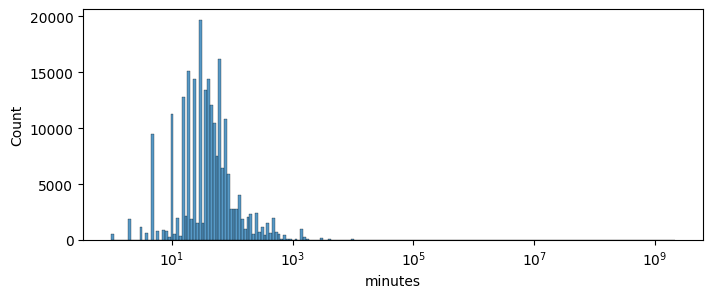

In [315]:
#This graph tells me that most of the recipes concentrate between 10 and something around 100 minutes
#Printing the distribution of n_ingredients
fig, ax = plt.subplots(figsize=[8, 3])
sns.histplot(df_recipes['minutes'], bins = 200, log_scale=True);

<Axes: xlabel='minutes', ylabel='n_reviews'>

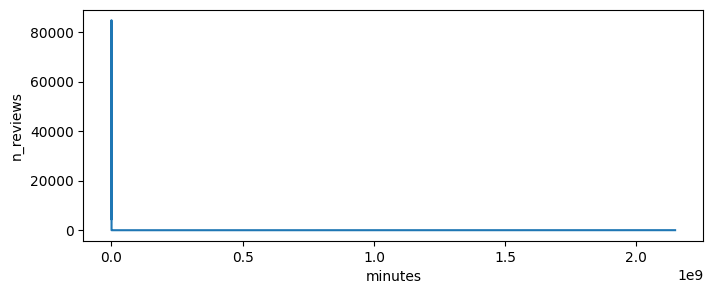

In [275]:
#Printing the distribution of n_ingredients
fig, ax = plt.subplots(figsize=[8, 3])
sns.lineplot(n_reviewsxminute, x='minutes', y='n_reviews', estimator = 'mean')

(0.0, 200.0)

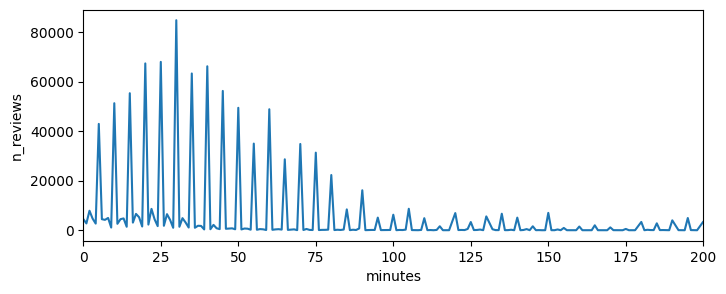

In [276]:
#Printing the distribution of n_ingredients
fig, ax = plt.subplots(figsize=[8, 3])
sns.lineplot(n_reviewsxminute, x='minutes', y='n_reviews', estimator = 'mean')
ax.set_xlim(0, 200)

(0.0, 200.0)

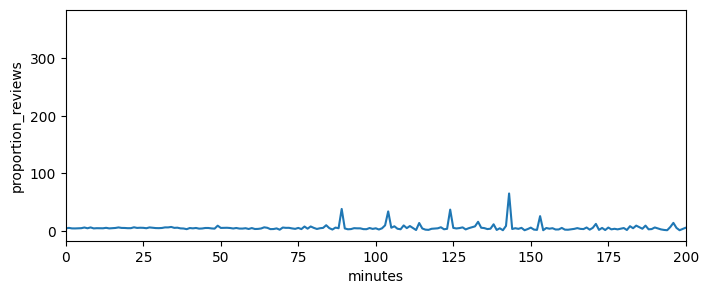

In [311]:
#Printing the distribution of n_ingredients
fig, ax = plt.subplots(figsize=[8, 3])
sns.lineplot(n_reviewsxminute, x='minutes', y='proportion_reviews', estimator = 'mean')
ax.set_xlim(0, 200)

In [314]:
#Filtering the most relevant 1000 reviews only on the dataset containing information of recipes
top_1000_reviews = 1000
top_1000_recipes = df_recipes.nlargest(top_1000_reviews, 'n_reviews').reset_index()

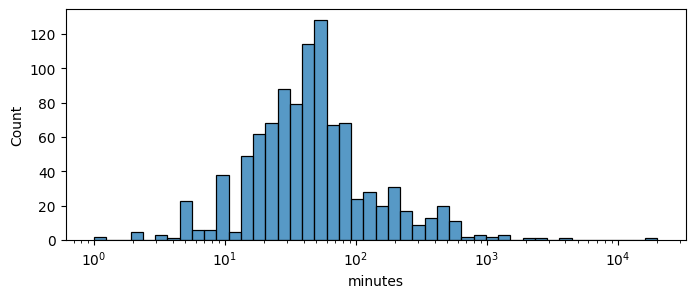

In [317]:
#This graph tells me that most of the recipes concentrate between 10 and something around 100 minutes
#Printing the distribution of n_ingredients
fig, ax = plt.subplots(figsize=[8, 3])
sns.histplot(top_1000_recipes['minutes'], log_scale=True);

In [318]:
top_1000_n_reviewsxminute = df_recipes.groupby('minutes')['n_reviews'].sum().sort_values(ascending = False).reset_index()
top_1000_n_reviewsxminute = pd.merge(top_1000_n_reviewsxminute, 
                            top_1000_recipes.groupby('minutes').size().reset_index().rename(columns = {0:'n_recipes'}), 
                            on = 'minutes')
top_1000_n_reviewsxminute['proportion_reviews'] = top_1000_n_reviewsxminute['n_reviews']/top_1000_n_reviewsxminute['n_recipes']

In [319]:
top_1000_n_reviewsxminute

,minutes,n_reviews,n_recipes,proportion_reviews
0,30,84800,72,1177.777778
1,25,67977,52,1307.250000
2,20,67356,49,1374.612245
3,40,66199,59,1122.016949
4,35,63295,64,988.984375
...,...,...,...,...
140,218,123,1,123.000000
141,114,122,1,122.000000
142,1090,120,1,120.000000
143,20190,114,1,114.000000


(0.0, 200.0)

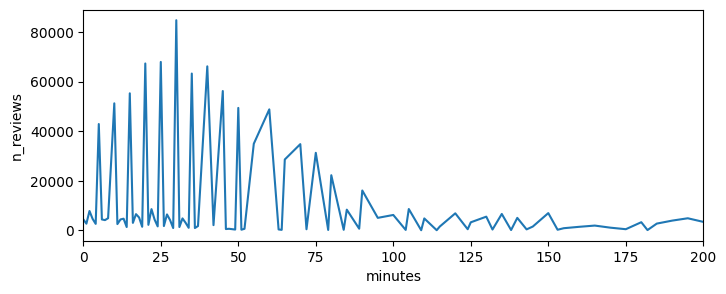

In [324]:
#Printing the distribution of n_ingredients
fig, ax = plt.subplots(figsize=[8, 3])
sns.lineplot(top_1000_n_reviewsxminute, x='minutes', y='n_reviews', estimator = 'mean')
ax.set_xlim(0,200)

(0.0, 200.0)

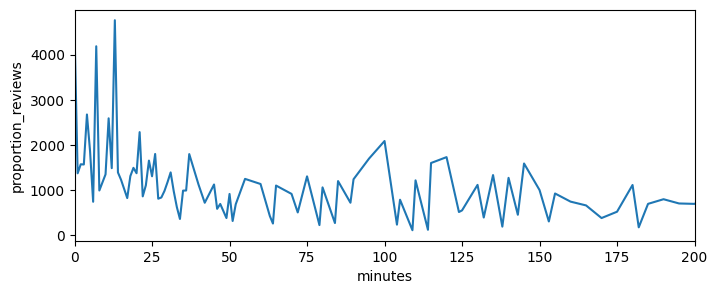

In [325]:
#Printing the distribution of n_ingredients
fig, ax = plt.subplots(figsize=[8, 3])
sns.lineplot(top_1000_n_reviewsxminute, x='minutes', y='proportion_reviews', estimator = 'mean')
ax.set_xlim(0,200)

We can verify that most that 

In [268]:
n_reviews

NameError: name 'n_reviews' is not defined

In [259]:
df_recipes.groupby('minutes')['rating'].mean().sort_values(ascending = False).reset_index()

,minutes,rating
0,484,5.0
1,3610,5.0
2,3070,5.0
3,3040,5.0
4,3035,5.0
...,...,...
883,20163,0.0
884,129600,0.0
885,87842,0.0
886,355,0.0


In [1]:
available_indicators_x=['minutes','n_steps','n_ingredients']
available_indicators_y=['n_reviews','rating']

In [ ]:
external_stylesheets = ['https://codepen.io/chriddyp/pen/bWLwgP.css']

#app = JupyterDash(__name__, external_stylesheets=external_stylesheets)

app = dash.Dash(__name__, external_stylesheets=external_stylesheets)

# Create server variable with Flask server object for use with gunicorn
server = app.server

app.layout = html.Div([
    html.Div([

        html.Div([
            dcc.Dropdown(
                id='crossfilter-xaxis-column',
                options=[{'label': i, 'value': i} for i in available_indicators_x],
                value='minutes'
            ),
            dcc.RadioItems(
                id='crossfilter-xaxis-type',
                options=[{'label': i, 'value': i} for i in ['Linear', 'Log']],
                value='Linear',
                labelStyle={'display': 'inline-block'}
            )
        ],
        style={'width': '49%', 'display': 'inline-block'}),

        html.Div([
            dcc.Dropdown(
                id='crossfilter-yaxis-column',
                options=[{'label': i, 'value': i} for i in available_indicators_y],
                value='n_reviews'
            ),
            dcc.RadioItems(
                id='crossfilter-yaxis-type',
                options=[{'label': i, 'value': i} for i in ['Linear', 'Log']],
                value='Linear',
                labelStyle={'display': 'inline-block'}
            )
        ], style={'width': '49%', 'float': 'right', 'display': 'inline-block'})
    ], style={
        'borderBottom': 'thin lightgrey solid',
        'backgroundColor': 'rgb(250, 250, 250)',
        'padding': '10px 5px'
    }),

    html.Div([
        dcc.Graph(
            id='crossfilter-indicator-scatter',
            hoverData={'points': [{'customdata': 'Japan'}]}
        )
    ], style={'width': '49%', 'display': 'inline-block', 'padding': '0 20'}),
    html.Div([
        dcc.Graph(id='x-time-series'),
        dcc.Graph(id='y-time-series'),
    ], style={'display': 'inline-block', 'width': '49%'}),

    html.Div(dcc.Slider(
        id='crossfilter-year--slider',
        min=df['Year'].min(),
        max=df['Year'].max(),
        value=df['Year'].max(),
        marks={str(year): str(year) for year in df['Year'].unique()},
        step=None
    ), style={'width': '49%', 'padding': '0px 20px 20px 20px'})
])


@app.callback(
    dash.dependencies.Output('crossfilter-indicator-scatter', 'figure'),
    [dash.dependencies.Input('crossfilter-xaxis-column', 'value'),
     dash.dependencies.Input('crossfilter-yaxis-column', 'value'),
     dash.dependencies.Input('crossfilter-xaxis-type', 'value'),
     dash.dependencies.Input('crossfilter-yaxis-type', 'value'),
     dash.dependencies.Input('crossfilter-year--slider', 'value')])
def update_graph(xaxis_column_name, yaxis_column_name,
                 xaxis_type, yaxis_type,
                 year_value):
    dff = df[df['Year'] == year_value]

    return {
        'data': [dict(
            x=dff[dff['Indicator Name'] == xaxis_column_name]['Value'],
            y=dff[dff['Indicator Name'] == yaxis_column_name]['Value'],
            text=dff[dff['Indicator Name'] == yaxis_column_name]['Country Name'],
            customdata=dff[dff['Indicator Name'] == yaxis_column_name]['Country Name'],
            mode='markers',
            marker={
                'size': 25,
                'opacity': 0.7,
                'color': 'orange',
                'line': {'width': 2, 'color': 'purple'}
            }
        )],
        'layout': dict(
            xaxis={
                'title': xaxis_column_name,
                'type': 'linear' if xaxis_type == 'Linear' else 'log'
            },
            yaxis={
                'title': yaxis_column_name,
                'type': 'linear' if yaxis_type == 'Linear' else 'log'
            },
            margin={'l': 40, 'b': 30, 't': 10, 'r': 0},
            height=450,
            hovermode='closest'
        )
    }


def create_time_series(dff, axis_type, title):
    return {
        'data': [dict(
            x=dff['Year'],
            y=dff['Value'],
            mode='lines+markers'
        )],
        'layout': {
            'height': 225,
            'margin': {'l': 20, 'b': 30, 'r': 10, 't': 10},
            'annotations': [{
                'x': 0, 'y': 0.85, 'xanchor': 'left', 'yanchor': 'bottom',
                'xref': 'paper', 'yref': 'paper', 'showarrow': False,
                'align': 'left', 'bgcolor': 'rgba(255, 255, 255, 0.5)',
                'text': title
            }],
            'yaxis': {'type': 'linear' if axis_type == 'Linear' else 'log'},
            'xaxis': {'showgrid': False}
        }
    }


@app.callback(
    dash.dependencies.Output('x-time-series', 'figure'),
    [dash.dependencies.Input('crossfilter-indicator-scatter', 'hoverData'),
     dash.dependencies.Input('crossfilter-xaxis-column', 'value'),
     dash.dependencies.Input('crossfilter-xaxis-type', 'value')])
def update_y_timeseries(hoverData, xaxis_column_name, axis_type):
    country_name = hoverData['points'][0]['customdata']
    dff = df[df['Country Name'] == country_name]
    dff = dff[dff['Indicator Name'] == xaxis_column_name]
    title = '<b>{}</b><br>{}'.format(country_name, xaxis_column_name)
    return create_time_series(dff, axis_type, title)


@app.callback(
    dash.dependencies.Output('y-time-series', 'figure'),
    [dash.dependencies.Input('crossfilter-indicator-scatter', 'hoverData'),
     dash.dependencies.Input('crossfilter-yaxis-column', 'value'),
     dash.dependencies.Input('crossfilter-yaxis-type', 'value')])
def update_x_timeseries(hoverData, yaxis_column_name, axis_type):
    dff = df[df['Country Name'] == hoverData['points'][0]['customdata']]
    dff = dff[dff['Indicator Name'] == yaxis_column_name]
    return create_time_series(dff, axis_type, yaxis_column_name)

In [101]:
df_recipes.head()

,index,name,recipe_id,minutes,contributor_id,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients,rating,reviews_count,soup
0,22168,best banana bread,2886,65,1762,"[time-to-make, course, main-ingredient, cuisin...","[272.8, 16.0, 97.0, 14.0, 7.0, 31.0, 14.0]",13,"['remove odd pots and pans from oven', 'prehea...",you'll never need another banana bread recipe ...,"[butter, granulated sugar, eggs, bananas, all-...",8,4.185989,1613,time-to-make course main-ingredient cuisine pr...
1,213826,to die for crock pot roast,27208,545,28201,"[weeknight, time-to-make, course, main-ingredi...","[295.2, 14.0, 0.0, 15.0, 99.0, 19.0, 0.0]",7,"['place beef roast in crock pot', 'mix the dri...","amazing flavor, and so simple! no salt needed ...","[beef roast, brown gravy mix, dried italian sa...",5,4.288570,1601,weeknight time-to-make course main-ingredient ...
2,66687,crock pot chicken with black beans cream cheese,89204,243,137839,"[time-to-make, course, main-ingredient, prepar...","[679.2, 53.0, 39.0, 38.0, 91.0, 75.0, 16.0]",5,"['take 4-5 frozen , yes , frozen , boneless ch...",i love this crock-pot chicken recipe for two r...,"[boneless chicken breasts, black beans, corn, ...",5,4.220393,1579,time-to-make course main-ingredient preparatio...
3,62431,creamy cajun chicken pasta,39087,25,30534,"[30-minutes-or-less, time-to-make, course, mai...","[719.1, 63.0, 12.0, 34.0, 78.0, 120.0, 15.0]",4,['place chicken and cajun seasoning in a bowl ...,n'awlin's style of chicken with an updated alf...,"[boneless skinless chicken breast halves, ling...",12,4.541436,1448,30-minutes-or-less time-to-make course main-in...
4,22388,best ever banana cake with cream cheese frosting,67256,75,82367,"[weeknight, time-to-make, course, main-ingredi...","[503.5, 31.0, 222.0, 15.0, 11.0, 61.0, 25.0]",18,"['preheat oven to 275f', 'grease and flour a 9...",this is one of (if not) the best banana cake i...,"[bananas, lemon juice, flour, baking soda, sal...",13,4.329047,1322,weeknight time-to-make course main-ingredient ...


In [117]:
df_recipes['word_count_on_steps'] = df_recipes['steps'].apply(lambda x: len(str(x).split(" ")))

In [118]:
print(df_recipes['steps'][0])

['remove odd pots and pans from oven', 'preheat oven to 350 / 180', 'cream together butter and sugar', 'add eggs and crushed bananas', 'combine well', 'sift together flour , soda and salt', 'add to creamed mixture', 'add vanilla', 'mix just until combined', 'do not overmix', 'pour into greased and floured loaf pan', 'bake at 350 / 180 for 55 minutes', 'keeps well , refrigerated']


In [120]:
df_recipes[['name','word_count_on_steps']]

,name,word_count_on_steps
0,best banana bread,64
1,to die for crock pot roast,59
2,crock pot chicken with black beans cream cheese,69
3,creamy cajun chicken pasta,68
4,best ever banana cake with cream cheese frosting,182
...,...,...
39995,norwegian scrambled eggs with smoked salmon an...,76
39996,norwegian stuffed eggs,46
39997,not a secret anymore japanese steakhouse whi...,69
39998,not just another pasta salad,62


In [113]:
def avg_word(sentence):
    words = sentence.split()
    return (sum(len(word) for word in words)/len(words))
df_recipes['avg_word'] = df_recipes['steps'].apply(lambda x: avg_word(x)) 
df_recipes[['name','avg_word']].head()

,name,avg_word
0,best banana bread,4.984375
1,to die for crock pot roast,4.322034
2,crock pot chicken with black beans cream cheese,3.724638
3,creamy cajun chicken pasta,4.352941
4,best ever banana cake with cream cheese frosting,4.302198


In [243]:
df_recipes.head()

,level_0,index,name,recipe_id,minutes,contributor_id,tags,nutrition,n_steps,steps,...,n_ingredients,rating,reviews_count,soup,word_count,avg_word,word_count_per_step,word_count_on_steps,words_per_step,ingredients_parsed
0,0,22168,best banana bread,2886,65,1762,"[time-to-make, course, main-ingredient, cuisin...","[272.8, 16.0, 97.0, 14.0, 7.0, 31.0, 14.0]",13,"['remove odd pots and pans from oven', 'prehea...",...,8,4.185989,1613,time-to-make course main-ingredient cuisine pr...,64,4.984375,64,64,4.923077,butter granulated sugar egg banana flour
1,1,213826,to die for crock pot roast,27208,545,28201,"[weeknight, time-to-make, course, main-ingredi...","[295.2, 14.0, 0.0, 15.0, 99.0, 19.0, 0.0]",7,"['place beef roast in crock pot', 'mix the dri...",...,5,4.288570,1601,weeknight time-to-make course main-ingredient ...,59,4.322034,59,59,8.428571,beef gravy salad ranch
2,2,66687,crock pot chicken with black beans cream cheese,89204,243,137839,"[time-to-make, course, main-ingredient, prepar...","[679.2, 53.0, 39.0, 38.0, 91.0, 75.0, 16.0]",5,"['take 4-5 frozen , yes , frozen , boneless ch...",...,5,4.220393,1579,time-to-make course main-ingredient preparatio...,69,3.724638,69,69,13.800000,chicken breast bean salsa cream cheese
3,3,62431,creamy cajun chicken pasta,39087,25,30534,"[30-minutes-or-less, time-to-make, course, mai...","[719.1, 63.0, 12.0, 34.0, 78.0, 120.0, 15.0]",4,['place chicken and cajun seasoning in a bowl ...,...,12,4.541436,1448,30-minutes-or-less time-to-make course main-in...,68,4.352941,68,68,17.000000,chicken breast linguine cajun butter onion cre...
4,4,22388,best ever banana cake with cream cheese frosting,67256,75,82367,"[weeknight, time-to-make, course, main-ingredi...","[503.5, 31.0, 222.0, 15.0, 11.0, 61.0, 25.0]",18,"['preheat oven to 275f', 'grease and flour a 9...",...,13,4.329047,1322,weeknight time-to-make course main-ingredient ...,182,4.302198,182,182,10.111111,banana lemon flour butter sugar egg buttermilk...


In [241]:
df_users.head()

,user_id,recipe_id,date,rating,review
0,38094,40893,2003-02-17,4,Great with a salad. Cooked on top of stove for...
1,1293707,40893,2011-12-21,5,"So simple, so delicious! Great for chilly fall..."
2,8937,44394,2002-12-01,4,This worked very well and is EASY. I used not...
3,126440,85009,2010-02-27,5,I made the Mexican topping and took it to bunk...
4,57222,85009,2011-10-01,5,"Made the cheddar bacon topping, adding a sprin..."


In [ ]:
df.groupby[by='recipe_id']